In [1]:
import random

import os
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf
import librosa
import librosa.display
import random
from hmmlearn import hmm
import tensorflow as tf

import IPython.display as idp

# 푸리에 변환을 위한 라이브러리
import math
from scipy.interpolate import splrep, splev



## DNN-HMM

In [2]:
audio_file = 'C:\workspace\data\wait.wav'
y, sr = librosa.load(audio_file)
info = sf.info(audio_file)

print(info)
print(f'{audio_file} ->[{y},{sr}]')

C:\workspace\data\wait.wav
samplerate: 22050 Hz
channels: 1
duration: 1.500 s
format: WAV (Microsoft) [WAV]
subtype: Unsigned 8 bit PCM [PCM_U8]
C:\workspace\data\wait.wav ->[[ 0.         0.        -0.0078125 ...  0.         0.         0.       ],22050]


C:\Users\93end\AppData\Local\Temp\ipykernel_20032\3668656612.py:13: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


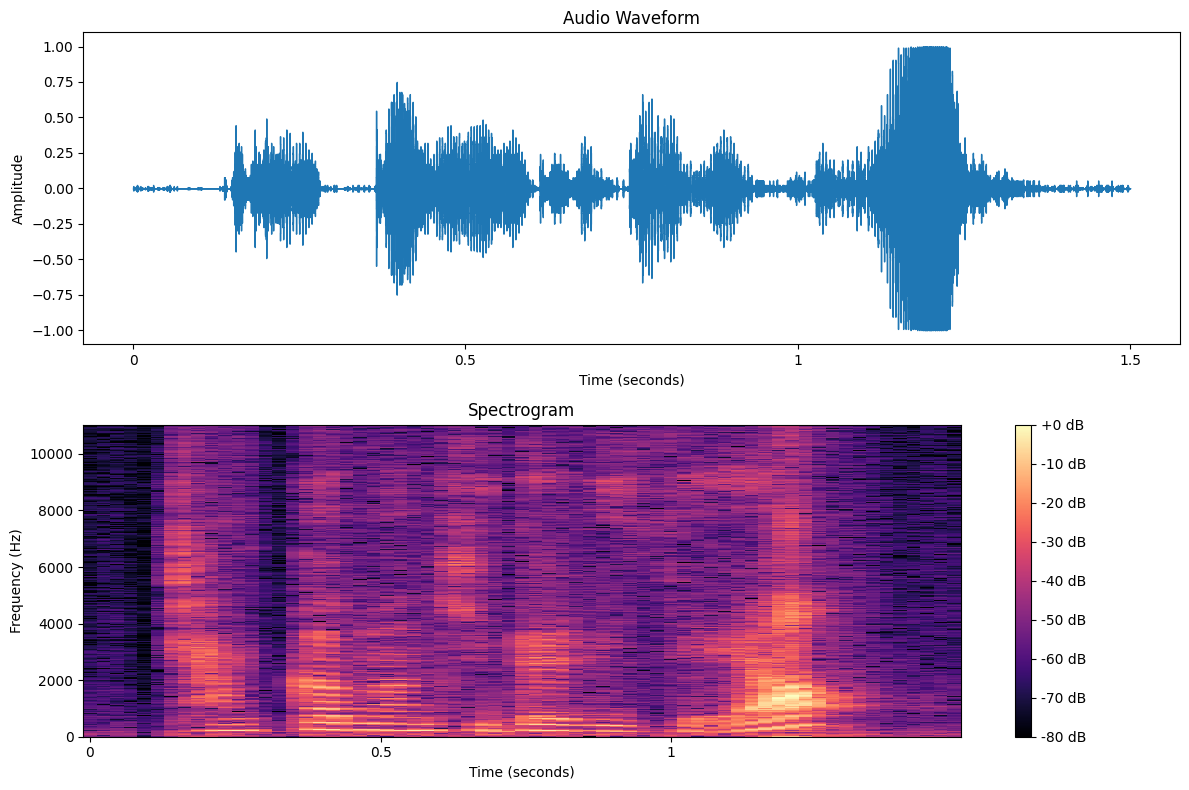

In [3]:
plt.figure(figsize=(12, 8))


# Plot the waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Plot the spectrogram
plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

(13, 65)


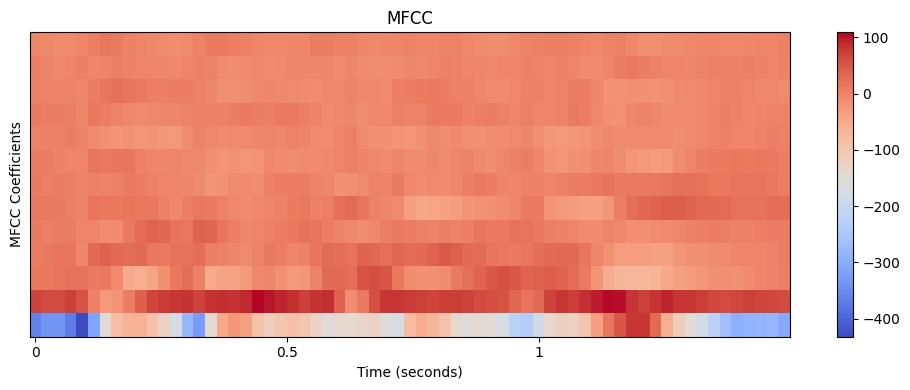

In [4]:
mfcc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13) #차원 13
print(mfcc.shape)

# Visualize MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (seconds)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()


In [6]:
#정규화
mfcc = (mfcc - np.mean(mfcc))/ np.std(mfcc) # 평균/표준편차

In [14]:
#DNN구성

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=mfcc.shape[0]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               3584      
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 4)                

In [16]:
#DNN 모델을 binary로 변환
model.compile(optimizer='adam', loss='mse')

In [17]:
model.fit(x=mfcc.T,y=np.zeros((mfcc.shape[1],2)), epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 3ms/step - loss: 0.2503
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 3/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 6/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 8/10
3/3 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2500


In [18]:
abstruct_features =model.predict(mfcc.T)

3/3 [==============================] - 0s 2ms/step


In [21]:
print(f'original : {mfcc.shape}')
print(f'absturct : {abstruct_features.shape}')

original : (13, 65)
absturct : (65, 2)
